In [209]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [210]:
# define borders, where hidden number could be
min_border_number = 1
max_border_number = 100

# quantity of checks.
# it will be used in comparing results of 'game_core_v2' engine and mine
number_of_checks = 1000

In [133]:
# the function to generate random number in some borders

# to generate random number in range [1, 10], use this function like:
# generate_random_number(1, 10)
# return (int)

def generate_random_number(min_border, max_border):
    return (random.randint(min_border, max_border))

In [213]:
# the function to generate random number in some borders and find out that number with minimum count steps

# to use in this way:
# find_out_hidden_number(15, 10, 20)
# where:
# 15 - hidden numner
# 10, 20 - borders, which used to find out hidden numbers
# return (int1, int2)
# int1 - hidden number, that really was find by function
# int2 - cycle quantity steps to find out hidden number

def find_out_hidden_number(hidden_number, min_border, max_border):
    
    # temporary variables
    count = 1
    temp_min = min_border
    temp_max = max_border

    while True:
        predict = int ((temp_max + temp_min) / 2)
        
        if (hidden_number == predict): # hidden numer has been found
            break
        elif (hidden_number > predict): # hidden number didn find
            temp_min = predict + 1
        else:
            temp_max = predict - 1
            
        count += 1
    
    return (count, predict)

In [221]:
# the function, that find out hidden number randomly (reworked example) - 'game_core_v2'

# to use in this way:
# game_core_v2(15, 10, 20)
# where:
# 15 - hidden numner
# 10, 20 - borders, which used to find out hidden numbers
# return (int1, int2)
# int1 - hidden number, that really was find by function
# int2 - cycle quantity steps to find out hidden number

def game_core_v2(hidden_number, min_border, max_border):
    '''Сначала устанавливаем любое random число, а потом уменьшаем или увеличиваем его в зависимости от того, больше оно или меньше нужного.
       Функция принимает загаданное число и возвращает число попыток'''
    
    count = 1
    predict = generate_random_number(min_border, max_border)
    while hidden_number != predict:
        count+=1
        if hidden_number > predict: 
            predict += 1
        elif hidden_number < predict: 
            predict -= 1
    return (count, predict) # выход из цикла, если угадали

In [237]:
# lets check the function 'find_out_hidden_number()'

print ("Let's check, does 'find_out_hidden_number()' function could ")
print ("find specified number (i.e. 15), and how many steps it needs for this.\n")

count1, hidden_number = find_out_hidden_number(hidden_number=15, min_border=min_border_number, \
                                     max_border=max_border_number)

print ("Yes, it works!")
print ("The hidden number %s has been found for %s cycle steps.\n" % (hidden_number, count1))

print ("Let's compare the same result for function 'game_core_v2()'\n")

count2, hidden_number = game_core_v2(hidden_number=15, min_border=min_border_number, \
                                     max_border=max_border_number)

print ("Yes, it also works!")
print ("The hidden number %s has been found for %s cycle steps.\n" % (hidden_number, count2))

print ("As wee see, the function 'game_core_v2()' a bit slowly, ")
print ("because do %s steps to find out hidden number than function 'find_out_hidden_number()'" % (count2 - count1))

Let's check, does 'find_out_hidden_number()' function could 
find specified number (i.e. 15), and how many steps it needs for this.

Yes, it works!
The hidden number 15 has been found for 5 cycle steps.

Let's compare the same result for function 'game_core_v2()'

Yes, it also works!
The hidden number 15 has been found for 84 cycle steps.

As wee see, the function 'game_core_v2()' a bit slowly, 
because do 79 steps to find out hidden number than function 'find_out_hidden_number()'


In [243]:
print ("Lets compare result of those functions in a big amounts executions, i.e. %s\n" % number_of_checks)


# data lists for functions 'find_out_hidden_number()' and 'game_core_v2'
function_data = []
function_data_gc_v2 = []

for iterator in range(number_of_checks):
    temp_dict = {}
    temp_dict_gc_v2 = {}
    
    # generating hidden number
    hidden_number = generate_random_number(min_border_number, max_border_number) 
    temp_dict['count'], temp_dict['hidden_number'] = \
        find_out_hidden_number(hidden_number, min_border=min_border_number, max_border=max_border_number)
    temp_dict_gc_v2['count'], temp_dict_gc_v2['hidden_number'] = \
        game_core_v2(hidden_number, min_border=min_border_number, max_border=max_border_number)
    
    # appending results
    function_data.append(temp_dict)
    function_data_gc_v2.append(temp_dict_gc_v2)
    
    
print ("The result will be append in next lists:")
print ("'function_data[]' - for function 'find_out_hidden_number()'")
print ("'function_data_gc_v2[]' - for function 'game_core_v2'")

Lets compare result of those functions in a big amounts executions, i.e. 1000

The result will be append in next lists:
'function_data[]' - for function 'find_out_hidden_number()'
'function_data_gc_v2[]' - for function 'game_core_v2'


In [249]:
print ("Get dictionaries in which we will store data on the operation of both functions\n")

# 
function_data_counts = {}
function_data_hidden_numbers = {}
function_data_counts_sorted = {}
function_data_hidden_numbers_sorted = {}
function_data_counts_gc_v2 = {}
function_data_hidden_numbers_gc_v2 = {}
function_data_counts_sorted_gc_v2 = {}
function_data_hidden_numbers_sorted_gc_v2 = {}

for iterator in function_data:
    count = iterator['count']
    hidden_number = iterator['hidden_number']
    
    if (count in function_data_counts):
        function_data_counts[count] += 1
    else:
        function_data_counts[count] = 1
    
    if (hidden_number in function_data_hidden_numbers):
        function_data_hidden_numbers[hidden_number] += 1
    else:
        function_data_hidden_numbers[hidden_number] = 1

        
print ("Distribution of 'counts: quantities(%)' for function 'find_out_hidden_number()'")
for iterator in range(min(function_data_counts.keys()), max(function_data_counts.keys())+1):
    print ("{%s: %s}" % (iterator, round((function_data_counts[iterator] / number_of_checks) * 100, 1)), end=' ')
    function_data_counts_sorted[iterator] = function_data_counts[iterator]

# print ("\n\nDictionary of hidden numbers: quantity of hidden numbers (%)")
for iterator in range(min(function_data_hidden_numbers.keys()), max(function_data_hidden_numbers.keys())+1):
#     print ("{%s: %s}" % (iterator, round((function_data_hidden_numbers[iterator] / number_of_checks) * 100, 1)), \
#            end=' ')
    function_data_hidden_numbers_sorted[iterator] = function_data_hidden_numbers[iterator]
    
    
for iterator in function_data_gc_v2:
    count = iterator['count']
    hidden_number = iterator['hidden_number']
    
    if (count in function_data_counts_gc_v2):
        function_data_counts_gc_v2[count] += 1
    else:
        function_data_counts_gc_v2[count] = 1
    
    if (hidden_number in function_data_hidden_numbers_gc_v2):
        function_data_hidden_numbers_gc_v2[hidden_number] += 1
    else:
        function_data_hidden_numbers_gc_v2[hidden_number] = 1

        
print ("\n\nDistribution of 'counts: quantities(%)' for function 'game_core_v2'")
for iterator in range(min(function_data_counts_gc_v2.keys()), max(function_data_counts_gc_v2.keys())+1):
    if (iterator in function_data_counts_gc_v2.keys()):
        print ("{%s: %s}" % (iterator, round((function_data_counts_gc_v2[iterator] / number_of_checks) * 100, 1)),\
               end=' ')
        function_data_counts_sorted_gc_v2[iterator] = function_data_counts_gc_v2[iterator]

# print ("\n\nDictionary of hidden numbers: quantity of hidden numbers (%)")
for iterator in range(min(function_data_hidden_numbers_gc_v2.keys()), \
                      max(function_data_hidden_numbers_gc_v2.keys())+1):
    if (iterator in function_data_hidden_numbers_gc_v2.keys()):
#         print ("{%s: %s}" % (iterator, \
#                         round((function_data_hidden_numbers_gc_v2[iterator] / number_of_checks) * 100, 1)), end=' ')
        function_data_hidden_numbers_sorted_gc_v2[iterator] = function_data_hidden_numbers_gc_v2[iterator]

Get dictionaries in which we will store data on the operation of both functions

Distribution of 'counts: quantities(%)' for function 'find_out_hidden_number()'
{1: 1.0} {2: 2.3} {3: 3.6} {4: 8.8} {5: 15.9} {6: 32.4} {7: 36.0} 

Distribution of 'counts: quantities(%)' for function 'game_core_v2'
{1: 1.0} {2: 2.4} {3: 1.3} {4: 2.2} {5: 1.4} {6: 1.3} {7: 1.4} {8: 1.5} {9: 2.2} {10: 1.2} {11: 1.8} {12: 1.2} {13: 2.0} {14: 1.7} {15: 2.3} {16: 2.1} {17: 1.8} {18: 1.5} {19: 1.8} {20: 2.2} {21: 1.1} {22: 1.6} {23: 0.9} {24: 2.1} {25: 1.9} {26: 0.6} {27: 1.6} {28: 1.5} {29: 0.8} {30: 1.6} {31: 1.7} {32: 2.1} {33: 0.9} {34: 1.2} {35: 0.9} {36: 1.5} {37: 1.8} {38: 1.3} {39: 1.9} {40: 0.9} {41: 1.1} {42: 1.0} {43: 1.9} {44: 0.8} {45: 1.0} {46: 1.6} {47: 0.7} {48: 1.3} {49: 1.2} {50: 0.9} {51: 1.2} {52: 1.5} {53: 0.6} {54: 0.8} {55: 1.2} {56: 0.7} {57: 1.6} {58: 1.4} {59: 1.0} {60: 0.8} {61: 0.7} {62: 0.8} {63: 0.8} {64: 0.9} {65: 0.7} {66: 0.8} {67: 0.7} {68: 1.0} {69: 0.8} {70: 0.1} {71: 0.7} {7

In [251]:
print ("Let's get variance, mean and standart deviation for data of both functions.\n")

temp_list = [function_data_counts[iterator] for iterator in function_data_counts.keys()]
temp_list_gc_v2 = [function_data_counts_gc_v2[iterator] for iterator in function_data_counts.keys()]

print ("'find_out_hidden_number()' : ")
print ("variance : %s" % round(np.var(temp_list), 2))
print ("mean : %s" % round(np.mean(temp_list), 2))
print ("std : %s" % round(np.std(temp_list), 2))

print ("\n'game_core_v2' : ")
print ("variance : %s" % round(np.var(temp_list_gc_v2), 2))
print ("mean : %s" % round(np.mean(temp_list_gc_v2), 2))
print ("std : %s" % round(np.std(temp_list_gc_v2), 2))

Let's get variance, mean and standart deviation for data of both functions.

'find_out_hidden_number()' : 
variance : 18095.55
mean : 142.86
std : 134.52

'game_core_v2' : 
variance : 23.06
mean : 15.71
std : 4.8


And finnaly, lest build a graphs showing the number of steps to find the hidden number (in percent)
relative to all other values.

For function 'find_out_hidden_number()'


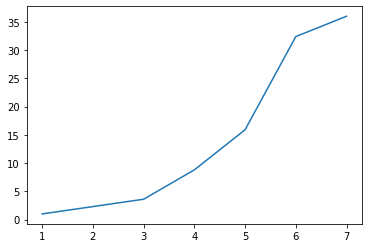

In [257]:
print ("And finnaly, lest build a graphs showing the number of steps to find the hidden number (in percent)")
print ("relative to all other values.\n")

print ("For function 'find_out_hidden_number()'")
plt.plot([iterator for iterator in function_data_counts_sorted.keys()], \
         [((function_data_counts_sorted[iterator] / number_of_checks) * 100) for iterator in function_data_counts_sorted.keys()])

For function ''game_core_v2()'


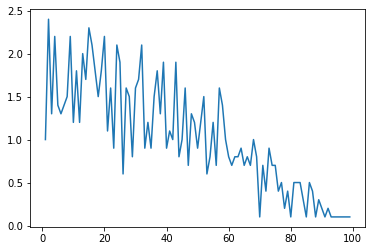

In [258]:
print ("For function ''game_core_v2()'")
plt.plot([iterator for iterator in function_data_counts_sorted_gc_v2.keys()], \
         [((function_data_counts_sorted_gc_v2[iterator] / number_of_checks) * 100) \
          for iterator in function_data_counts_sorted_gc_v2.keys()])